In [162]:
from typing import Callable
from math import factorial

def ODE_euler(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Solves (numerically) an ODE of the form
        dy/dt = f(t, y)
            y(t_0) = y_t0, a <= t_0 <= b
    using the Euler method for the N+1 points in the time range [a, b].

    It generates N+1 mesh points with:
        t_i = a + i*h, h = (a - b) / N,
    where h is the step size.


    ## Parameters
    ``a``: initial time
    ``b``: final time
    ``f``: function of two variables ``t`` and ``y``
    ``y_t0``: initial condition
    ``N``: number of mesh points

    ## Return
    ``ys``: a list of the N+1 approximated values of y
    ``ts``: a list of the N+1 mesh points
    ``h``: the step size h

    """
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

In [163]:
from math import factorial

def ODE_euler_nth(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    f_derivatives: list[Callable[[float, float], float]],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Solves (numerically) an ODE of the form
        dy/dt = f(t, y)
            y(t_0) = y_t0, a <= t_0 <= b
    using the Taylor method with (m - 1)th derivatives for the N+1 points in the time range [a, b].

    It generates N+1 mesh points with:
        t_i = a + i*h, h = (a - b) / N,
    where h is the step size.


    ## Parameters
    ``a``: initial time
    ``b``: final time
    ``f``: function of two variables ``t`` and ``y``
    ``f_derivatives``: list of (m - 1)th derivatives of f
    ``y_t0``: initial condition
    ``N``: number of mesh points

    ## Return
    ``ys``: a list of the N+1 approximated values of y
    ``ts``: a list of the N+1 mesh points
    ``h``: the step size h

    """
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        T = f(t, y)
        ders = [
            h / factorial(m + 2) * mth_derivative(t, y)
            for m, mth_derivative in enumerate(f_derivatives)
        ]
        T += sum(ders)
        y += h * T
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

Ejercicio 1.a

h = 0.5


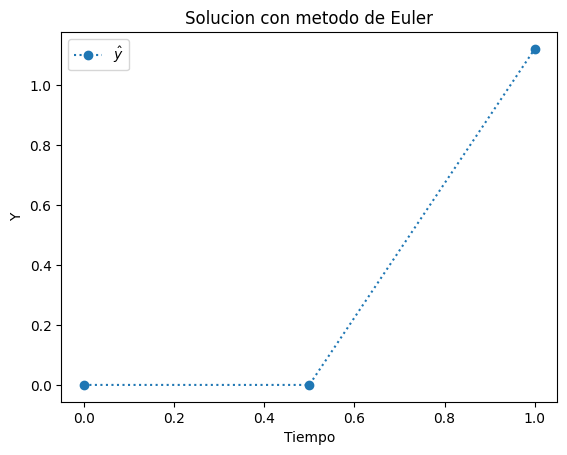

In [164]:
import math 
f = lambda t, y: t*math.e**(3*t)-2*y
y_t0 = 0

a = 0
b = 1

ys1,ts1, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=2)
print(f"h = {h}")

import matplotlib.pyplot as plt

plt.plot(ts1, ys1, marker="o", linestyle=":", label=r"$\hat{y}$")
plt.xlabel("Tiempo")
plt.ylabel("Y")
plt.title("Solucion con metodo de Euler")
plt.legend()
plt.show()

Ejercicio 1.b

h = 0.5


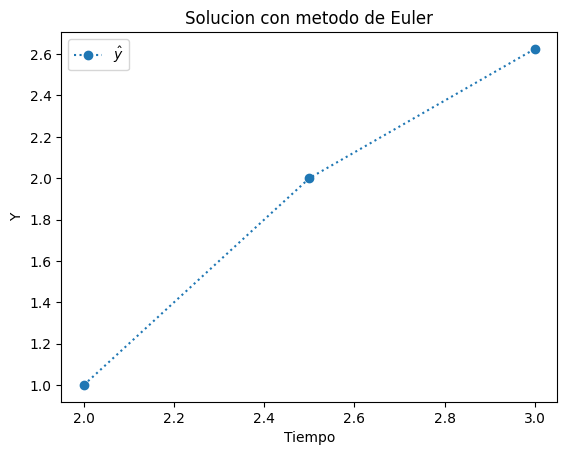

In [165]:
import matplotlib.pyplot as plt

f = lambda t, y: 1 + (t-y)**2
y_t0 = 1

a = 2
b = 3

ys2,ts2, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=2)
print(f"h = {h}")

plt.plot(ts2, ys2, marker="o", linestyle=":", label=r"$\hat{y}$")
plt.xlabel("Tiempo")
plt.ylabel("Y")
plt.title("Solucion con metodo de Euler")
plt.legend()
plt.show()

Ejercicio 1.c

h = 0.25


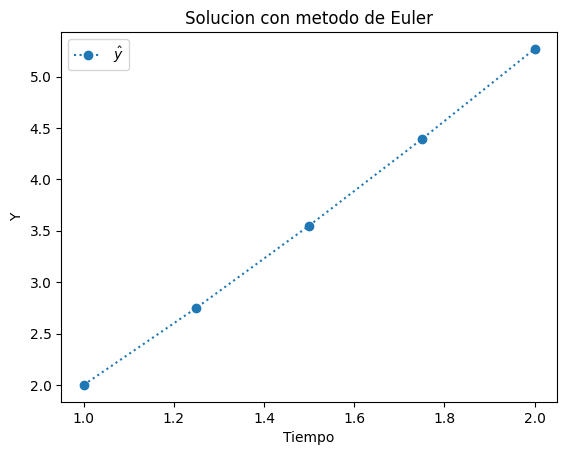

In [166]:
import matplotlib.pyplot as plt

f = lambda t, y: 1 + (y/t)
y_t0 = 2

a = 1
b = 2

ys3,ts3, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=4)
print(f"h = {h}")

plt.plot(ts3, ys3, marker="o", linestyle=":", label=r"$\hat{y}$")
plt.xlabel("Tiempo")
plt.ylabel("Y")
plt.title("Solucion con metodo de Euler")
plt.legend()
plt.show()

Ejercicio 1.d

h=0.25


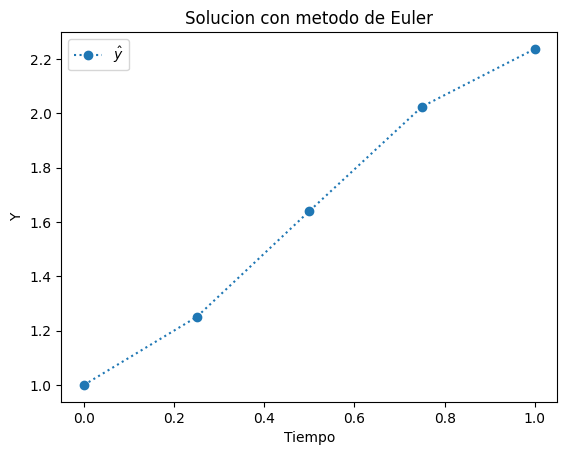

In [167]:
import matplotlib.pyplot as plt
import math

f = lambda t, y: math.cos(2*t)+math.sin(3*t)
y_t0 = 1

a = 0
b = 1

ys4,ts4, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=4)
print(f"h={h}")


plt.plot(ts4, ys4, marker="o", linestyle=":", label=r"$\hat{y}$")
plt.xlabel("Tiempo")
plt.ylabel("Y")
plt.title("Solucion con metodo de Euler")
plt.legend()
plt.show()

Ejercicio 2.a

error absoluto = 0.550648472699829


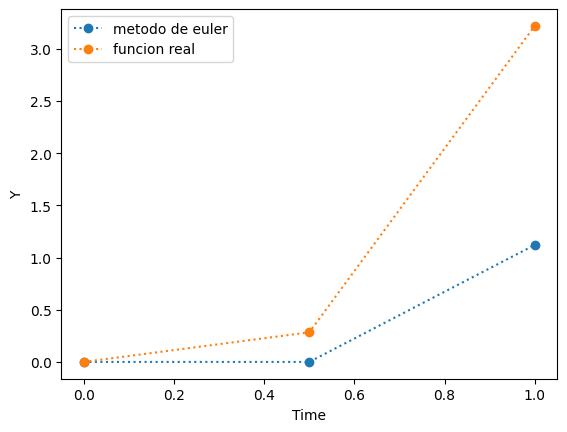

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import math
def f(t):
  return 1/5 * t * math.e**(3*t) - 1/25 * math.e**(3*t) + 1/25 * math.e**(-2*t)

array1 = np.zeros(3)
for i in range(0,3):
  array1[i] = f(ts1[i])

error1 = np.zeros(3)
for j in range(1,3):
  error1[j] = abs(array1[j] - ys1[j]) / abs(array1[j])

ereal = sum(error1)/len(error1)
print("error absoluto =" ,ereal)

plt.plot(ts1, ys1, marker="o", linestyle=":", label=r"metodo de euler")
plt.plot(ts1, array1, marker="o", linestyle=":", label=r"funcion real")
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend()
plt.show()


Ejercicio 2.b

error absoluto = 0.04696969696969694


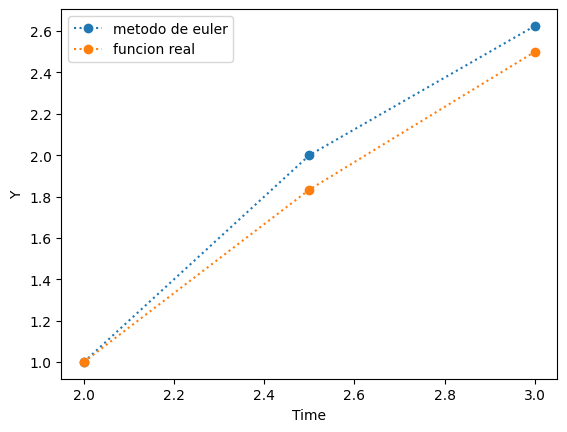

In [169]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
  return t + (1/(1-t))

array2 = np.zeros(3)
for i in range(0,3):
  array2[i] = f(ts2[i])

error2 = np.zeros(3)
for j in range(0,3):
  error2[j] = abs(array2[j] - ys2[j]) / abs(array2[j])

ereal = sum(error2)/len(error2)
print("error absoluto =" ,ereal)

plt.plot(ts2, ys2, marker="o", linestyle=":", label=r"metodo de euler")
plt.plot(ts2, array2, marker="o", linestyle=":", label=r"funcion real")
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend()
plt.show()

Ejercicio 2.c

error absoluto = 0.013575458924045315


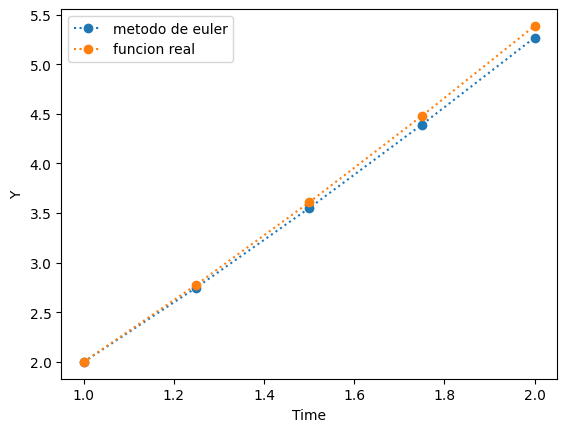

In [170]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
  return t * np.log(t) + 2*t

array3 = np.zeros(5)
for i in range(0,5):
  array3[i] = f(ts3[i])

error3 = np.zeros(5)
for j in range(0,5):
  error3[j] = abs(array3[j] - ys3[j]) / abs(array3[j])

ereal = sum(error3)/len(error3)
print("error absoluto =" ,ereal)

plt.plot(ts3, ys3, marker="o", linestyle=":", label=r"metodo de euler")
plt.plot(ts3, array3, marker="o", linestyle=":", label=r"funcion real")
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend()
plt.show()

Ejercicio 2.d

error absoluto = 0.035265188624637164


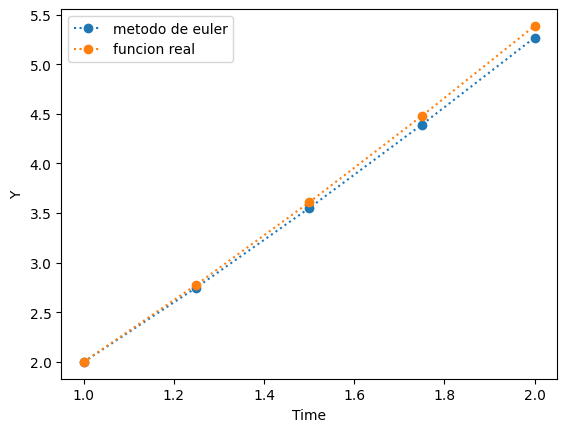

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import math
def f(t):
  return (1/2) * math.sin(2*t) - (1/3) * math.cos(3*t) + (4/3)

array4 = np.zeros(5)
for i in range(0,5):
  array4[i] = f(ts4[i])

error4 = np.zeros(5)
for j in range(0,5):
  error4[j] = abs(array4[j] - ys4[j]) / abs(array4[j])

ereal = sum(error4)/len(error4)
print("error absoluto =" ,ereal)

plt.plot(ts3, ys3, marker="o", linestyle=":", label=r"metodo de euler")
plt.plot(ts3, array3, marker="o", linestyle=":", label=r"funcion real")
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend()
plt.show()

Ejercicio 3.a

h = 0.1


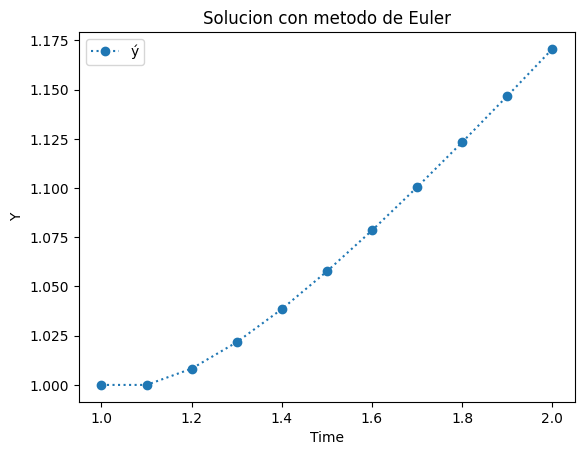

In [172]:
import matplotlib.pyplot as plt
f = lambda t, y: (y/t) - (y/t)**2
y_t0 = 1

a = 1
b = 2

ys1,ts1, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)
print(f"h = {h}")

plt.plot(ts1, ys1, marker="o", linestyle=":", label=r"ý")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solucion con metodo de Euler")
plt.legend()
plt.show()

Ejercicio 3.b

h = 0.2


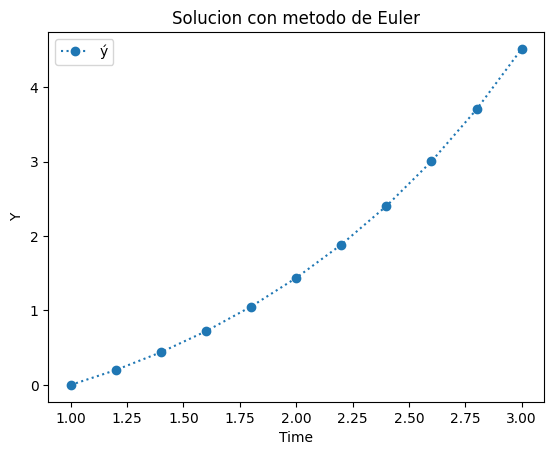

In [173]:
import matplotlib.pyplot as plt
f = lambda t, y: 1 + (y/t) + (y/t)**2
y_t0 = 0

a = 1
b = 3

ys2,ts2, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)
print(f"h = {h}")

plt.plot(ts2, ys2, marker="o", linestyle=":", label=r"ý")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solucion con metodo de Euler")
plt.legend()
plt.show()

Ejercicio 3.c

h = 0.2


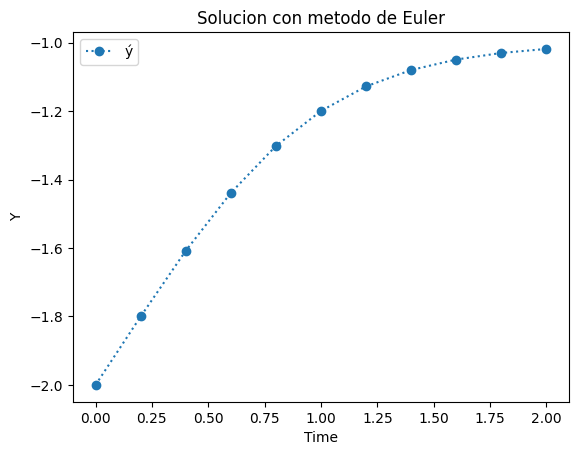

In [174]:
import matplotlib.pyplot as plt
f = lambda t, y: -(y + 1) * (y + 3)
y_t0 = -2

a = 0
b = 2

ys3,ts3, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)
print(f"h = {h}")

plt.plot(ts3, ys3, marker="o", linestyle=":", label=r"ý")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solucion con metodo de Euler")
plt.legend()
plt.show()

Ejercicio 3.d

h = 0.1


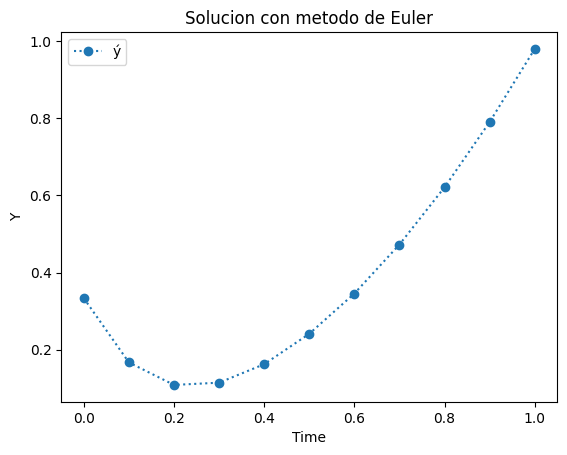

In [175]:
import matplotlib.pyplot as plt
f = lambda t, y: -5*y + 5*t**2 + 2*t
y_t0 = 1/3

a = 0
b = 1

ys4,ts4, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)
print(f"h = {h}")

plt.plot(ts4, ys4, marker="o", linestyle=":", label=r"ý")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solucion con metodo de Euler")
plt.legend()
plt.show()

Ejercicio 4.a

error absoluto = 0.007446209946514099


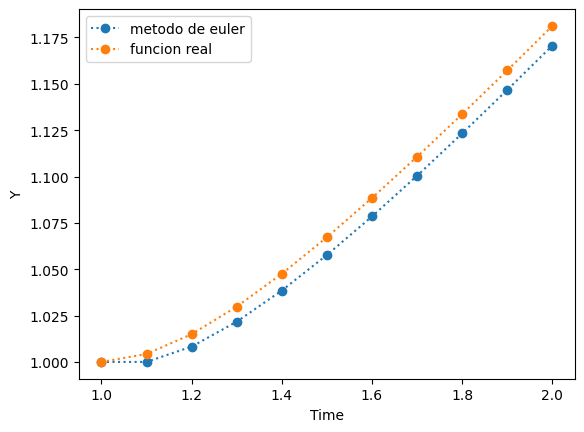

In [176]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
  return t/(1+np.log(t))

array1 = np.zeros(11)
for i in range(0,11):
  array1[i] = f(ts1[i])

error1 = np.zeros(11)
for j in range(0,11):
  error1[j] = abs(array1[j] - ys1[j]) / abs(array1[j])

ereal = sum(error1)/len(error1)
print("error absoluto =" ,ereal)

plt.plot(ts1, ys1, marker="o", linestyle=":", label=r"metodo de euler")
plt.plot(ts1, array1, marker="o", linestyle=":", label=r"funcion real")
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend()
plt.show()


Ejercicio 4.b

error absoluto = 0.13677461498200832


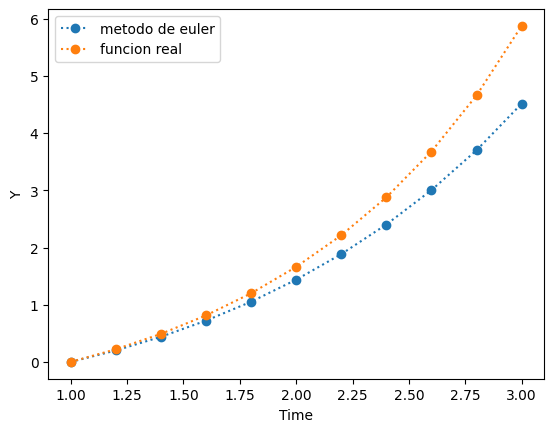

In [177]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
  return t*np.tan(np.log(t))

array2 = np.zeros(11)
for i in range(0,11):
  array2[i] = f(ts2[i])

error2 = np.zeros(11)
for j in range(1,11):
  error2[j] = abs(array2[j] - ys2[j]) / abs(array2[j])

ereal = sum(error2)/len(error2)
print("error absoluto =" ,ereal)

plt.plot(ts2, ys2, marker="o", linestyle=":", label=r"metodo de euler")
plt.plot(ts2, array2, marker="o", linestyle=":", label=r"funcion real")
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend()
plt.show()

Ejercicio 4.c

error absoluto = 0.019424466913874793


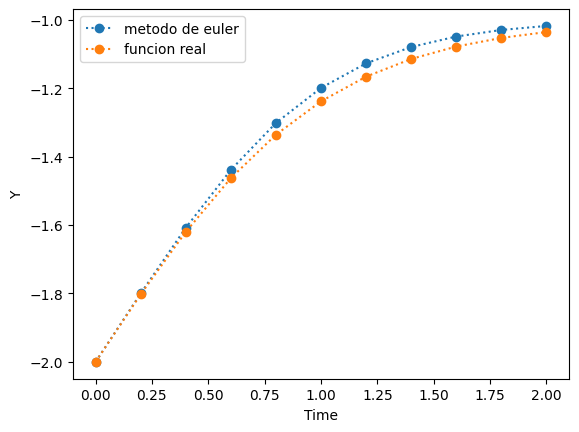

In [178]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
  return -3 + (2/(1+np.e**(-2*t)))

array3 = np.zeros(11)
for i in range(0,11):
  array3[i] = f(ts3[i])

error3 = np.zeros(11)
for j in range(0,11):
  error3[j] = abs(array3[j] - ys3[j]) / abs(array3[j])

ereal = sum(error3)/len(error3)
print("error absoluto =" ,ereal)

plt.plot(ts3, ys3, marker="o", linestyle=":", label=r"metodo de euler")
plt.plot(ts3, array3, marker="o", linestyle=":", label=r"funcion real")
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend()
plt.show()

Ejercicio 4.d

error absoluto = 0.12909541068138491


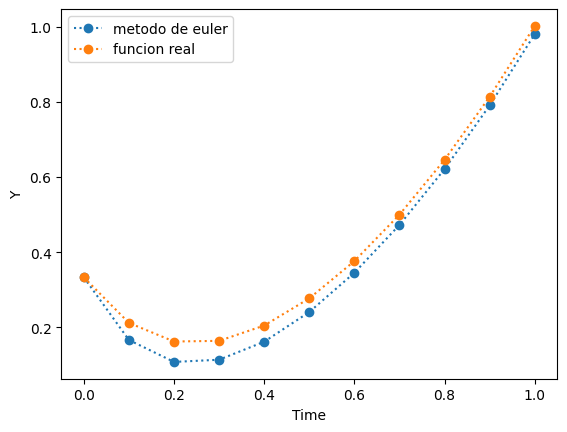

In [179]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
  return t**2 + 1/3 * np.e**(-5*t)

array4 = np.zeros(11)
for i in range(0,11):
  array4[i] = f(ts4[i])

error4 = np.zeros(11)
for j in range(0,11):
  error4[j] = abs(array4[j] - ys4[j]) / abs(array4[j])

ereal = sum(error4)/len(error4)
print("error absoluto =" ,ereal)

plt.plot(ts4, ys4, marker="o", linestyle=":", label=r"metodo de euler")
plt.plot(ts4, array4, marker="o", linestyle=":", label=r"funcion real")
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend()
plt.show()

Ejercicio 5.a

In [180]:
import numpy as np

def funcion(t):
  return t/(1+np.log(t))

f = lambda t, y: (y/t) - (y/t)**2
y_t0 = funcion(0.25)

a = 0.25
b = 0.93

ys1,ts1, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)
print(f'Aproximaciones con el método de euler y(0.25) = {y_t0} y y(0.93) = {ys1[10]}')
print(f'Utilizando la función real y(0.25) = {y_t0} y y(0.93) = {funcion(0.93)}')

error = abs(funcion(0.93) - ys1[10]) / abs(funcion(0.93))
print(f'Error relativo = {error}')


Aproximaciones con el método de euler y(0.25) = -0.6471748623905226 y y(0.93) = -2.7071461415639867e+43
Utilizando la función real y(0.25) = -0.6471748623905226 y y(0.93) = 1.0027718477462106
Error relativo = 2.6996630865220823e+43


Ejercicio 5.b

In [181]:
import numpy as np

def funcion(t):
  return t*np.tan(np.log(t))

f = lambda t, y: 1 + (y/t) + (y/t)**2
y_t0 = funcion(1.25)

a = 1.25
b = 1.93

ys2,ts2, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)

print(f'Aproximaciones con el método de euler y(1.25) = {y_t0} y y(1.93) = {ys2[10]}')
print(f'Utilizando la función real y(1.25) = {y_t0} y y(1.93) = {funcion(1.93)}')

error = abs(funcion(1.93) - ys2[10]) / abs(funcion(1.93))
print(f'Error relativo = {error}')

Aproximaciones con el método de euler y(1.25) = 0.2836531261952289 y y(1.93) = 1.4374792197818218
Utilizando la función real y(1.25) = 0.2836531261952289 y y(1.93) = 1.4902277738186658
Error relativo = 0.03539630314477184


Ejercicio 5.c

In [182]:
import numpy as np

def funcion(t):
  return -3 + (2/(1+np.e**(-2*t)))

f = lambda t, y: -(y + 1) * (y + 3)
y_t0 = funcion(2.10)

a = 2.10
b = 2.75

ys3,ts3, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)

print(f'Aproximaciones con el método de euler y(2.10) = {y_t0} y y(2.75) = {ys3[10]}')
print(f'Utilizando la función real y(2.10) = {y_t0} y y(2.75) = {funcion(2.75)}')

error = abs(funcion(2.75) - ys3[10]) / abs(funcion(2.75))
print(f'Error relativo = {error}')

Aproximaciones con el método de euler y(2.10) = -1.0295480633865461 y y(2.75) = -1.007435185889909
Utilizando la función real y(2.10) = -1.0295480633865461 y y(2.75) = -1.008140275431792
Error relativo = 0.0006993962636608098


Ejercicio 5.d

In [183]:
import numpy as np

def funcion(t):
  return t**2 + 1/3 * np.e**(-5*t)

f = lambda t, y: -5*y + 5*t**2 + 2*t
y_t0 = funcion(0.54)

a = 0.54
b = 0.94

ys4,ts4, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)

print(f'Aproximaciones con el método de euler y(0.54) = {y_t0} y y(0.94) = {ys4[10]}')
print(f'Utilizando la función real y(0.54) = {y_t0} y y(0.94) = {funcion(0.94)}')

error = abs(funcion(0.94) - ys4[10]) / abs(funcion(0.94))
print(f'Error relativo = {error}')

Aproximaciones con el método de euler y(0.54) = 0.3140018375799166 y y(0.94) = 0.8788643724536016
Utilizando la función real y(0.54) = 0.3140018375799166 y y(0.94) = 0.8866317590338986
Error relativo = 0.008760555327682542


Ejercicio 6.a

h = 0.5


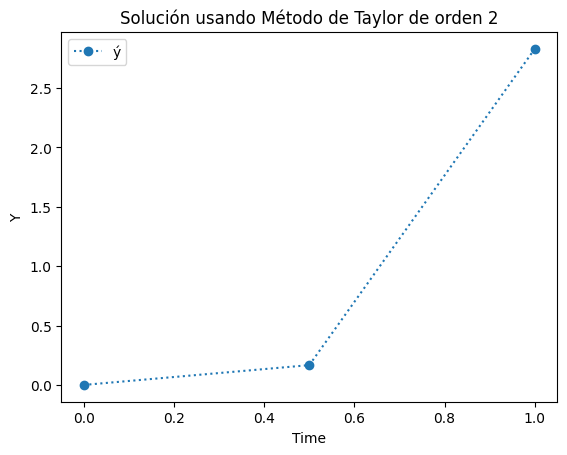

In [184]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda t, y: t*np.e**(3*t) - 2*y
f_p = lambda t, y: -2 * f(t,y) + np.e**(3*t) + 3*t*np.e**(3*t)
f_2p = lambda t, y: -2 * f_p(t,y) + 3 * np.e**(3*t) + 9*t*np.e**(3*t)

y_t0 = 0

a = 0
b = 1

ys_nth,ts_nth, h = ODE_euler_nth(a=a, b=b, y_t0=y_t0, f=f, N=2,f_derivatives=[f_p, f_2p])
print(f"h = {h}")

plt.plot(ts_nth, ys_nth, marker="o", linestyle=":", label=r"ý")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solución usando Método de Taylor de orden 2")
plt.legend()
plt.show()

Ejercicio 6.b

h = 0.5


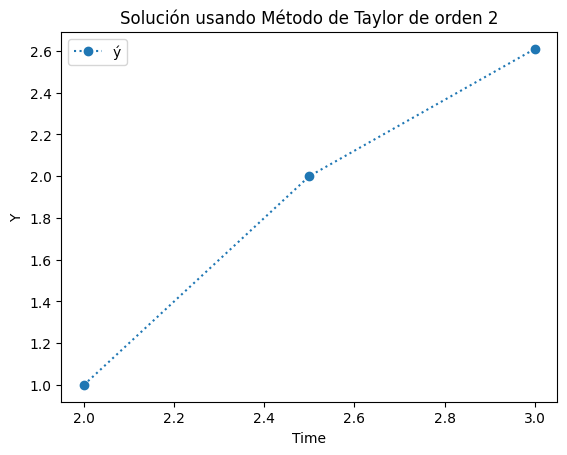

In [185]:
import matplotlib.pyplot as plt

f = lambda t, y: 1 + (t - y)**2
f_p = lambda t, y: 2 * (t - y) * (1 - f(t,y))
f_2p = lambda t, y: 2 * (1 - f(t,y))**2 - 2 * (t - y) * f_p(t,y)

y_t0 = 1

a = 2
b = 3

ys_nth,ts_nth, h = ODE_euler_nth(a=a, b=b, y_t0=y_t0, f=f, N=2,f_derivatives=[f_p, f_2p])
print(f"h = {h}")

plt.plot(ts_nth, ys_nth, marker="o", linestyle=":", label=r"ý")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solución usando Método de Taylor de orden 2")
plt.legend()
plt.show()

Ejercicio 6.c

h = 0.25


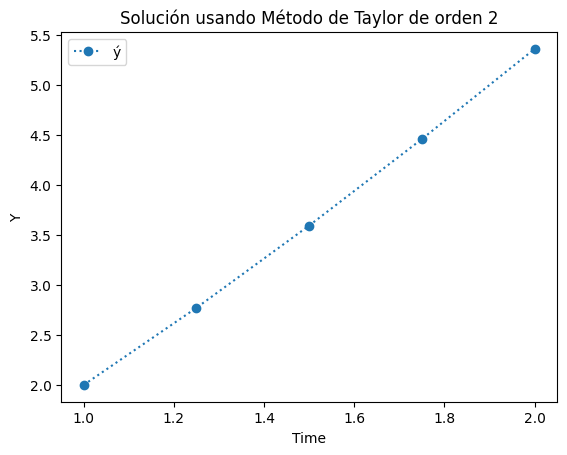

In [186]:
import matplotlib.pyplot as plt

f = lambda t, y: 1 + (y/t)
f_p = lambda t, y: (t * f(t,y) - y)/ t**2
f_2p = lambda t, y: -1/t**2

y_t0 = 2

a = 1
b = 2

ys_nth,ts_nth, h = ODE_euler_nth(a=a, b=b, y_t0=y_t0, f=f, N=4,f_derivatives=[f_p, f_2p])
print(f"h = {h}")

plt.plot(ts_nth, ys_nth, marker="o", linestyle=":", label=r"ý")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solución usando Método de Taylor de orden 2")
plt.legend()
plt.show()

Ejercicio 6.d

h = 0.25


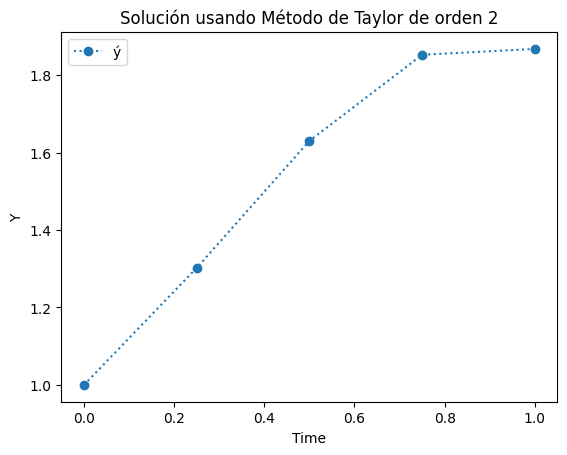

In [187]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda t, y: np.cos(2*t) + np.sin(3*t)
f_p = lambda t, y: -2 * np.sin(2*t) + 3 * np.cos(3*t)
f_2p = lambda t, y: -4 * np.cos(2*t) - 9 * np.sin(3*t)

y_t0 = 1

a = 0
b = 1

ys_nth,ts_nth, h = ODE_euler_nth(a=a, b=b, y_t0=y_t0, f=f, N=4,f_derivatives=[f_p, f_2p])
print(f"h = {h}")

plt.plot(ts_nth, ys_nth, marker="o", linestyle=":", label=r"ý")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solución usando Método de Taylor de orden 2")
plt.legend()
plt.show()

Ejercicio 7.a

h = 0.5


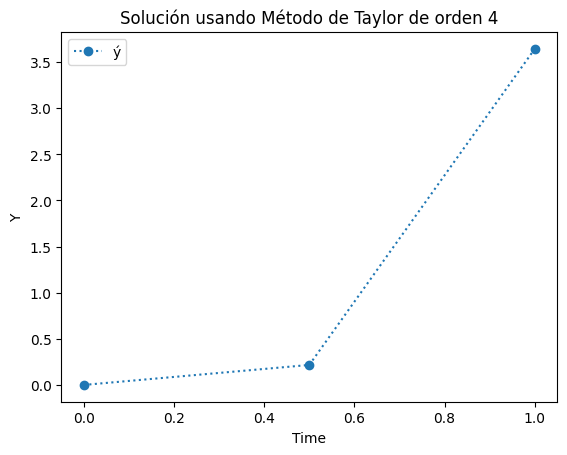

In [188]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda t, y: t * np.e**(3 * t) - 2 * y
f_p = lambda t, y: -2 * f(t, y) + np.e**(3 * t) + 3 * t * np.e**(3 * t)
f_2p = lambda t, y: -2 * f_p(t, y) + 3 * np.e**(3 * t) + 9 * t * np.e**(3 * t)
f_3p = lambda t, y: -2 * f_2p(t, y) + 6 * np.e**(3 * t) + 27 * t * np.e**(3 * t)
f_4p = lambda t, y: -2 * f_3p(t, y) + 12 * np.e**(3 * t) + 81 * t * np.e**(3 * t)

y_t0 = 0
a = 0
b = 1

ys_nth, ts_nth, h = ODE_euler_nth(a=a, b=b, y_t0=y_t0, f=f, N=2, f_derivatives=[f_p, f_2p, f_3p, f_4p])
print(f"h = {h}")

plt.plot(ts_nth, ys_nth, marker="o", linestyle=":", label=r"ý")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solución usando Método de Taylor de orden 4")
plt.legend()
plt.show()

Ejercicio 7.b

h = 0.5


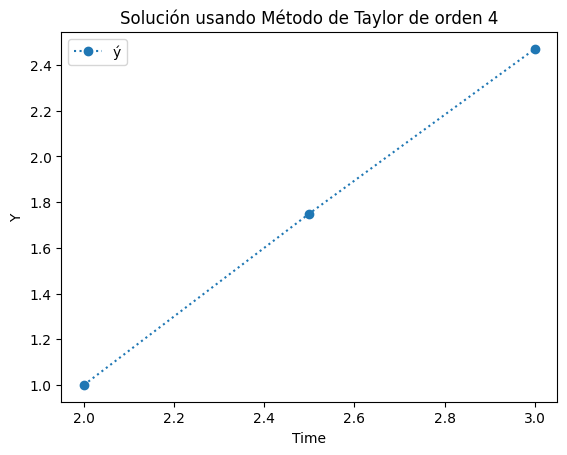

In [189]:
import matplotlib.pyplot as plt

# Definición de la función y sus derivadas
f = lambda t, y: 1 + (t - y)**2
f_p = lambda t, y: 2 * (t - y) * (1 - f(t, y))
f_2p = lambda t, y: 2 * (1 - f(t, y))**2 - 2 * (t - y) * f_p(t, y)
f_3p = lambda t, y: -4 * (t - y) * (1 - f(t, y)) * f_p(t, y) - 4 * (1 - f(t, y)) * (1 - f(t, y)) + 2 * (t - y) * (f_2p(t, y) - 2 * (1 - f(t, y)) * f_p(t, y))
f_4p = lambda t, y: -4 * (1 - f(t, y)) * (f_3p(t, y) + (t - y) * (f_p(t, y) - f_2p(t, y))) - 8 * (t - y) * (1 - f(t, y)) * f_p(t, y)

y_t0 = 1
a = 2
b = 3

# Calcula la solución usando el método de Taylor de orden 4
ys_nth, ts_nth, h = ODE_euler_nth(a=a, b=b, y_t0=y_t0, f=f, N=2, f_derivatives=[f_p, f_2p, f_3p, f_4p])
print(f"h = {h}")

# Graficar el resultado
plt.plot(ts_nth, ys_nth, marker="o", linestyle=":", label=r"ý")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solución usando Método de Taylor de orden 4")
plt.legend()

Ejercicio 7.c

h = 0.25


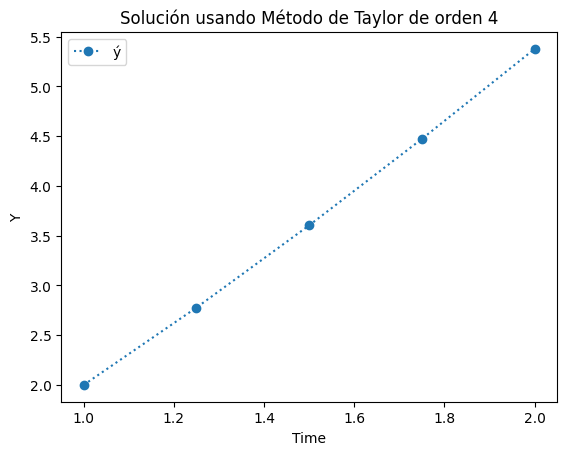

In [190]:
import matplotlib.pyplot as plt

f = lambda t, y: 1 + (y / t)
f_p = lambda t, y: (t * f(t, y) - y) / t**2
f_2p = lambda t, y: -1 / t**2
f_3p = lambda t, y: (2 * y - t * (2 + y / t)) / t**3
f_4p = lambda t, y: (6 * (t * (2 + y / t) - y) - 6 * (2 * y - t * (2 + y / t))) / t**4

y_t0 = 2
a = 1
b = 2

ys_nth, ts_nth, h = ODE_euler_nth(a=a, b=b, y_t0=y_t0, f=f, N=4, f_derivatives=[f_p, f_2p, f_3p, f_4p])
print(f"h = {h}")

plt.plot(ts_nth, ys_nth, marker="o", linestyle=":", label=r"ý")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solución usando Método de Taylor de orden 4")
plt.legend()
plt.show()


Ejercicio 7.d

h = 0.25


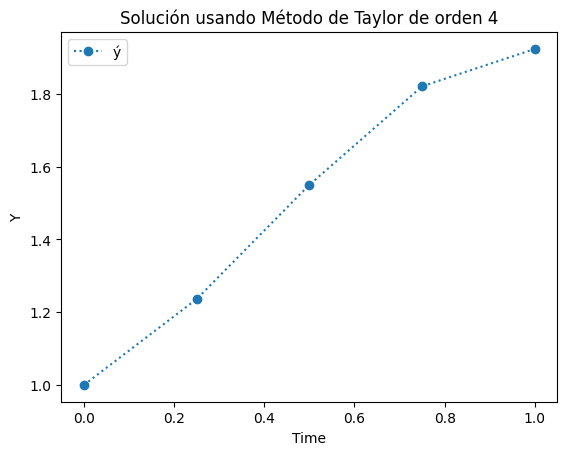

In [191]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda t, y: np.cos(2*t) + np.sin(3*t)
f_p = lambda t, y: -2 * np.sin(2*t) + 3 * np.cos(3*t)
f_2p = lambda t, y: -4 * np.cos(2*t) - 9 * np.sin(3*t)
f_3p = lambda t, y: 4 * np.sin(2*t) - 27 * np.cos(3*t)
f_4p = lambda t, y: 8 * np.cos(2*t) + 81 * np.sin(3*t)

y_t0 = 1
a = 0
b = 1

ys_nth, ts_nth, h = ODE_euler_nth(a=a, b=b, y_t0=y_t0, f=f, N=4, f_derivatives=[f_p, f_2p, f_3p, f_4p])
print(f"h = {h}")

plt.plot(ts_nth, ys_nth, marker="o", linestyle=":", label=r"ý")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solución usando Método de Taylor de orden 4")
plt.legend()
plt.show()